In [1]:
from pogo import Pogo

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import  datasets, metrics
from sklearn.preprocessing import MinMaxScaler
from urllib.request import urlopen
from urllib.parse import urlparse
import os.path

In [3]:
#data from scikitlearn tutorial on clustering 

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

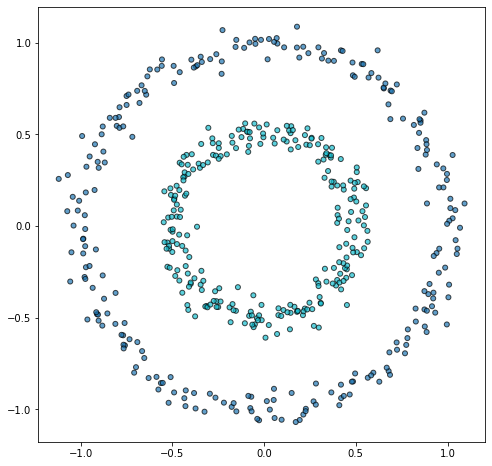

In [4]:
X=noisy_circles[0]
y=noisy_circles[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

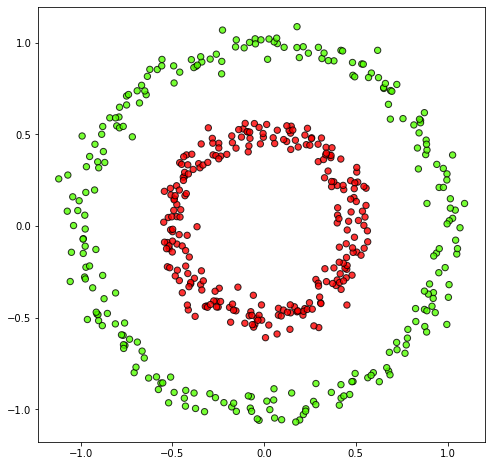

In [5]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [6]:
pogo.idx_

2389

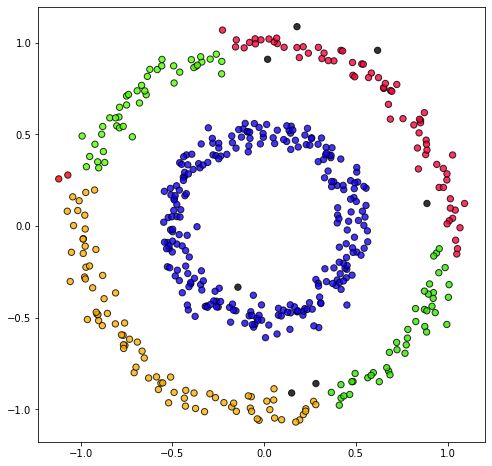

In [7]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [8]:
pogo.cluster_dict_list_[pogo.candidates_[1]]

{0: 23,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 2,
 6: 1,
 7: 1,
 8: 2,
 9: 2,
 10: 2,
 11: 1,
 12: 1,
 13: 1,
 14: 2,
 15: 1,
 16: 1,
 17: 1,
 18: 2,
 19: 2,
 20: 2,
 21: 1,
 22: 2,
 23: 23,
 24: 2,
 25: 1,
 26: 2,
 27: 1,
 28: 23,
 29: 2,
 30: 1,
 31: 2,
 32: 2,
 33: 2,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 2,
 40: 1,
 41: 2,
 42: 1,
 43: 2,
 44: 23,
 45: 2,
 46: 2,
 47: 1,
 48: 1,
 49: 23,
 50: 1,
 51: 2,
 52: 1,
 53: 2,
 54: 2,
 55: 2,
 56: 1,
 57: 2,
 58: 2,
 59: 1,
 60: 23,
 61: 1,
 62: 1,
 63: 1,
 64: 1,
 65: 2,
 66: 2,
 67: 1,
 68: 1,
 69: 23,
 70: 2,
 71: 2,
 72: 1,
 73: 1,
 74: 2,
 75: 1,
 76: 1,
 77: 23,
 78: 1,
 79: 1,
 80: 1,
 81: 2,
 82: 1,
 83: 2,
 84: 1,
 85: 1,
 86: 1,
 87: 2,
 88: 1,
 89: 2,
 90: 2,
 91: 1,
 92: 1,
 93: 2,
 94: 2,
 95: 1,
 96: -1,
 97: 1,
 98: 2,
 99: 2,
 100: 23,
 101: 1,
 102: 23,
 103: 1,
 104: -1,
 105: 1,
 106: 23,
 107: 2,
 108: 1,
 109: 2,
 110: 1,
 111: 2,
 112: 2,
 113: 2,
 114: 1,
 115: 1,
 116: 1,
 117: 1,
 118: 2,
 119: 2,
 120: 1,
 121: 2,

In [9]:
pogo.labels_

array([ 0,  1,  1,  1,  1,  2,  1,  1,  3,  3,  4,  1,  1,  1,  3,  1,  1,
        1,  3,  2,  4,  1,  4,  0,  2,  1,  2,  1,  0,  4,  1,  3,  3,  3,
        1,  1,  1,  1,  1,  4,  1,  2,  1,  4,  0,  2,  4,  1,  1,  0,  1,
        3,  1,  3,  3,  2,  1,  3,  4,  1,  0,  1,  1,  1,  1,  3,  2,  1,
        1,  0,  3,  2,  1,  1,  3,  1,  1,  0,  1,  1,  1,  4,  1,  4,  1,
        1,  1,  3,  1,  2,  4,  1,  1,  3,  3,  1, -1,  1,  2,  4,  0,  1,
        0,  1, -1,  1,  0,  4,  1,  3,  1,  2,  3,  2,  1,  1,  1,  1,  4,
        3,  1,  2,  3,  1,  1,  4,  2,  1,  1,  1,  1,  4,  1,  2,  1,  1,
        1,  1,  1,  3, -1,  2,  0,  2,  1,  2,  1,  1,  4,  2,  3,  1,  3,
        1,  3,  2,  2,  2,  1,  2,  1,  4,  2,  1,  4,  0,  1,  1,  1,  1,
        1,  3,  1,  1,  1,  4,  1,  2,  1,  1,  1,  3,  0,  1,  2,  1,  1,
        1,  1,  0,  1,  1,  0,  1,  1,  1,  1,  0,  2,  3,  3,  3,  3,  1,
        3,  1,  4,  1,  2,  1,  1,  3,  0,  1,  2,  1,  2,  3,  2,  1,  2,
        0,  2,  0,  1,  1

In [10]:
pogo.idx_

1717

In [11]:
pogo.candidates_[:10]

[2389, 1996, 1717, 794, 2320, 1933, 1824, 1254, 1297, 1335]

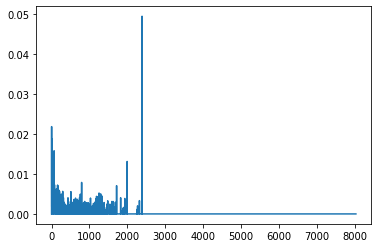

In [12]:
plt.plot(pogo.gap_vector_)

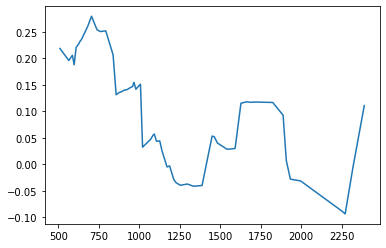

In [13]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


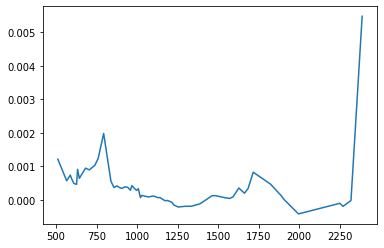

In [14]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [15]:
silhouette_indices[np.argmax(silhouette_gap)]

2389

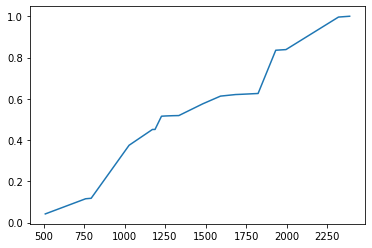

In [16]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [17]:
rand_indices[np.argmax(rand_array)]

2389

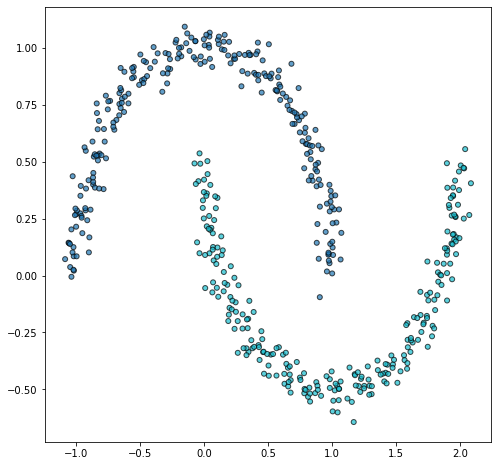

In [18]:
X=noisy_moons[0]
y=noisy_moons[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

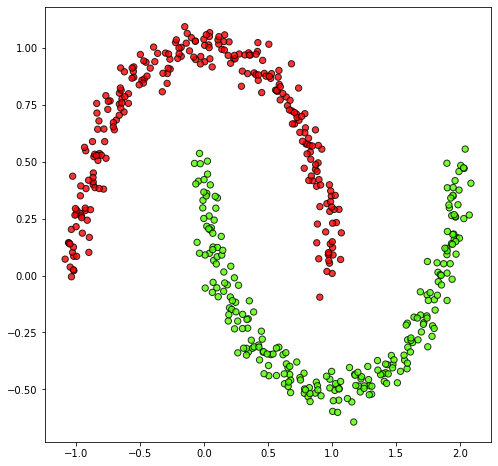

In [19]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [ ]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [ ]:
pogo.idx_

In [ ]:
pogo.candidates_[:10]

In [ ]:
plt.plot(pogo.gap_vector_)

In [ ]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)

In [ ]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [ ]:
silhouette_indices[np.argmax(silhouette_gap)]

In [ ]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [ ]:
rand_indices[np.argmax(rand_array)]

In [ ]:
X=blobs[0]
y=blobs[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [ ]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [ ]:
pogo.idx_

In [ ]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [ ]:
pogo.idx_

In [ ]:
pogo.candidates_[:10]

In [ ]:
plt.plot(pogo.gap_vector_)

In [ ]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)

In [ ]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [ ]:
silhouette_indices[np.argmax(silhouette_gap)]

In [ ]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [ ]:
rand_indices[np.argmax(rand_array)]

In [ ]:
X=no_structure[0]
y=no_structure[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [ ]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [ ]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [ ]:
pogo.idx_

In [ ]:
pogo.candidates_[:10]

In [ ]:
plt.plot(pogo.gap_vector_)

In [ ]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


In [ ]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [ ]:
silhouette_indices[np.argmax(silhouette_gap)]

In [ ]:
X=aniso[0]
y=aniso[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [ ]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [ ]:
pogo.idx_

In [ ]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [ ]:
pogo.idx_

In [ ]:
pogo.candidates_[:10]

In [ ]:
plt.plot(pogo.gap_vector_)

In [ ]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


In [ ]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [ ]:
silhouette_indices[np.argmax(silhouette_gap)]

In [ ]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [ ]:
rand_indices[np.argmax(rand_array)]

In [ ]:
X=varied[0]
y=varied[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [ ]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [ ]:
pogo.idx_

In [ ]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [ ]:
pogo.idx_

In [ ]:
pogo.candidates_[:10]

In [ ]:
plt.plot(pogo.gap_vector_)

In [ ]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


In [ ]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [ ]:
silhouette_indices[np.argmax(silhouette_gap)]

In [ ]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [ ]:
rand_indices[np.argmax(rand_array)]

In [ ]:
#DBSCAN Demo Data from scikitlearn
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, y = datasets.make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)
filename = 'dbscan-demo-data'

In [ ]:

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [ ]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [ ]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [ ]:
pogo.idx_

In [ ]:
plt.plot(pogo.gap_vector_)

In [ ]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


In [ ]:
silhouette_indices[np.argmax(silhouette_array)]

In [ ]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [ ]:
silhouette_indices[np.argmax(silhouette_gap)]

In [ ]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [ ]:
rand_indices[np.argmax(rand_array)]

In [ ]:

urls_with_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

urls_without_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/overlap.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/a1.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

ground_truth_urls = ['https://cs.joensuu.fi/sipu/datasets/overlap.pa'
    
]

urls_with_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_with_ground_truth
}


urls_without_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_without_ground_truth
}


ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in ground_truth_urls
}

In [ ]:
def return_dataset(filename):
    if filename in urls_with_ground_truth:
        url= urls_with_ground_truth[filename]
        print(url)
        parse = urlparse(url)
        print(filename)
        raw_data = urlopen(url)
        data = np.loadtxt(raw_data)

        print(data.shape)
        print(data[:10])

        y = data[:,2]
        print(y.shape)
        X = data[:,:2]
        print(X.shape)
        return X, y, filename


In [ ]:
X, y, filename = return_dataset('R15.txt')

In [ ]:

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [ ]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [ ]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [ ]:
pogo.candidates_[:11]

In [ ]:
pogo.labels_

In [ ]:
def replace_groups(data):
    a,b,c, = np.unique(data, True, True)
    _, ret = np.unique(b[c], False, True)
    return ret

In [ ]:
replace_groups(pogo.labels_)

In [ ]:
pogo.idx_

In [ ]:
pogo.initial_idx_

In [ ]:
plt.plot(pogo.gap_vector_)

In [ ]:
pogo.candidates_[2]

In [ ]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(20)


In [ ]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [ ]:
silhouette_indices[np.argmax(silhouette_gap)]

In [ ]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [ ]:
rand_indices[np.argmax(rand_array)]

In [ ]:
X, y, filename = return_dataset('D31.txt')

In [ ]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [ ]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [ ]:
pogo.gap_vector_

In [ ]:
np.sum(pogo.gap_vector_)